<a href="https://colab.research.google.com/github/Sanket-Nimbalkar/Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Zomato Restaurant Clustering and Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 - Sanket Nimbalkar**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Zomato, a pioneering Indian restaurant aggregator and food delivery platform, emerged in 2008 under the vision of Deepinder Goyal and Pankaj Chaddah. The platform serves as a comprehensive hub, offering users information, menus, and reviews of restaurants. Furthermore, Zomato extends its services to include food delivery options from partnered restaurants, enriching the dining experience for users in select cities.

India, celebrated for its diverse and vibrant culinary landscape, showcases a myriad of restaurants and hotel resorts, embodying the nation's unity in diversity. The restaurant industry in India is experiencing a transformative phase, witnessing a surge in people embracing restaurant dining and opting for food deliveries. This shifting landscape prompted a detailed exploration of Zomato's extensive restaurant data for each city in India.

The project unfolds through two distinct datasets, each holding self-explanatory columns that unlock a wealth of information. The first dataset, focusing on restaurant names and metadata, presents a unique opportunity for clustering restaurants into segments. Crucial details such as cuisine types and pricing structures within this dataset offer valuable insights for a comprehensive cost vs. benefit analysis. On the other hand, the second dataset centers around restaurant reviews, offering a treasure trove of data for sentiment analysis. Beyond just the reviews, the metadata of reviewers holds the potential to identify and distinguish influential critics within the industry.

In essence, this project is a deep dive into the intricacies of the Indian food industry, leveraging Zomato's robust datasets. The goal is to extract insights, uncover interesting facts, and analyze figures that illuminate the dynamics of the restaurant landscape in different cities across India. By meticulously exploring both restaurant details and customer sentiments, the project seeks to provide a nuanced understanding of the evolving preferences, trends, and challenges within the Indian dining landscape. As the culinary scene continues to evolve, this analysis serves as a valuable tool for stakeholders, offering a comprehensive perspective on the pulse of the Indian restaurant industry.




# **GitHub Link -**

https://github.com/Sanket-Nimbalkar/Zomato-Restaurant-Clustering-and-Sentiment-Analysis


# **Problem Statement**


The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [468]:
# Import Libraries
# Import Libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from textblob import TextBlob
from IPython.display import Image
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
import gensim

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [469]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [470]:
file_path1 = '/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv'
file_path2 = '/content/drive/MyDrive/Zomato Restaurant reviews.csv'

In [471]:
meta_df = pd.read_csv(file_path1)
review_df = pd.read_csv(file_path2)

In [472]:
meta_df_main = meta_df.copy()

### Dataset First View

In [473]:
# Dataset First Look
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [474]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [475]:
# Dataset Rows & Columns count
print(f' We have total {meta_df.shape[0]} rows and {meta_df.shape[1]} columns in Meta dataset. & {review_df.shape[0]} rows and {review_df.shape[1]} in review dataset')


 We have total 105 rows and 6 columns in Meta dataset. & 10000 rows and 7 in review dataset


### Dataset Information

In [476]:
# Dataset Info
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [477]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [478]:
# Dataset Duplicate Value Count
meta_df.duplicated().sum()

0

In [479]:
review_df.duplicated().sum()

36

#### Missing Values/Null Values

In [480]:
# Missing Values/Null Values Count
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [481]:
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

<Axes: >

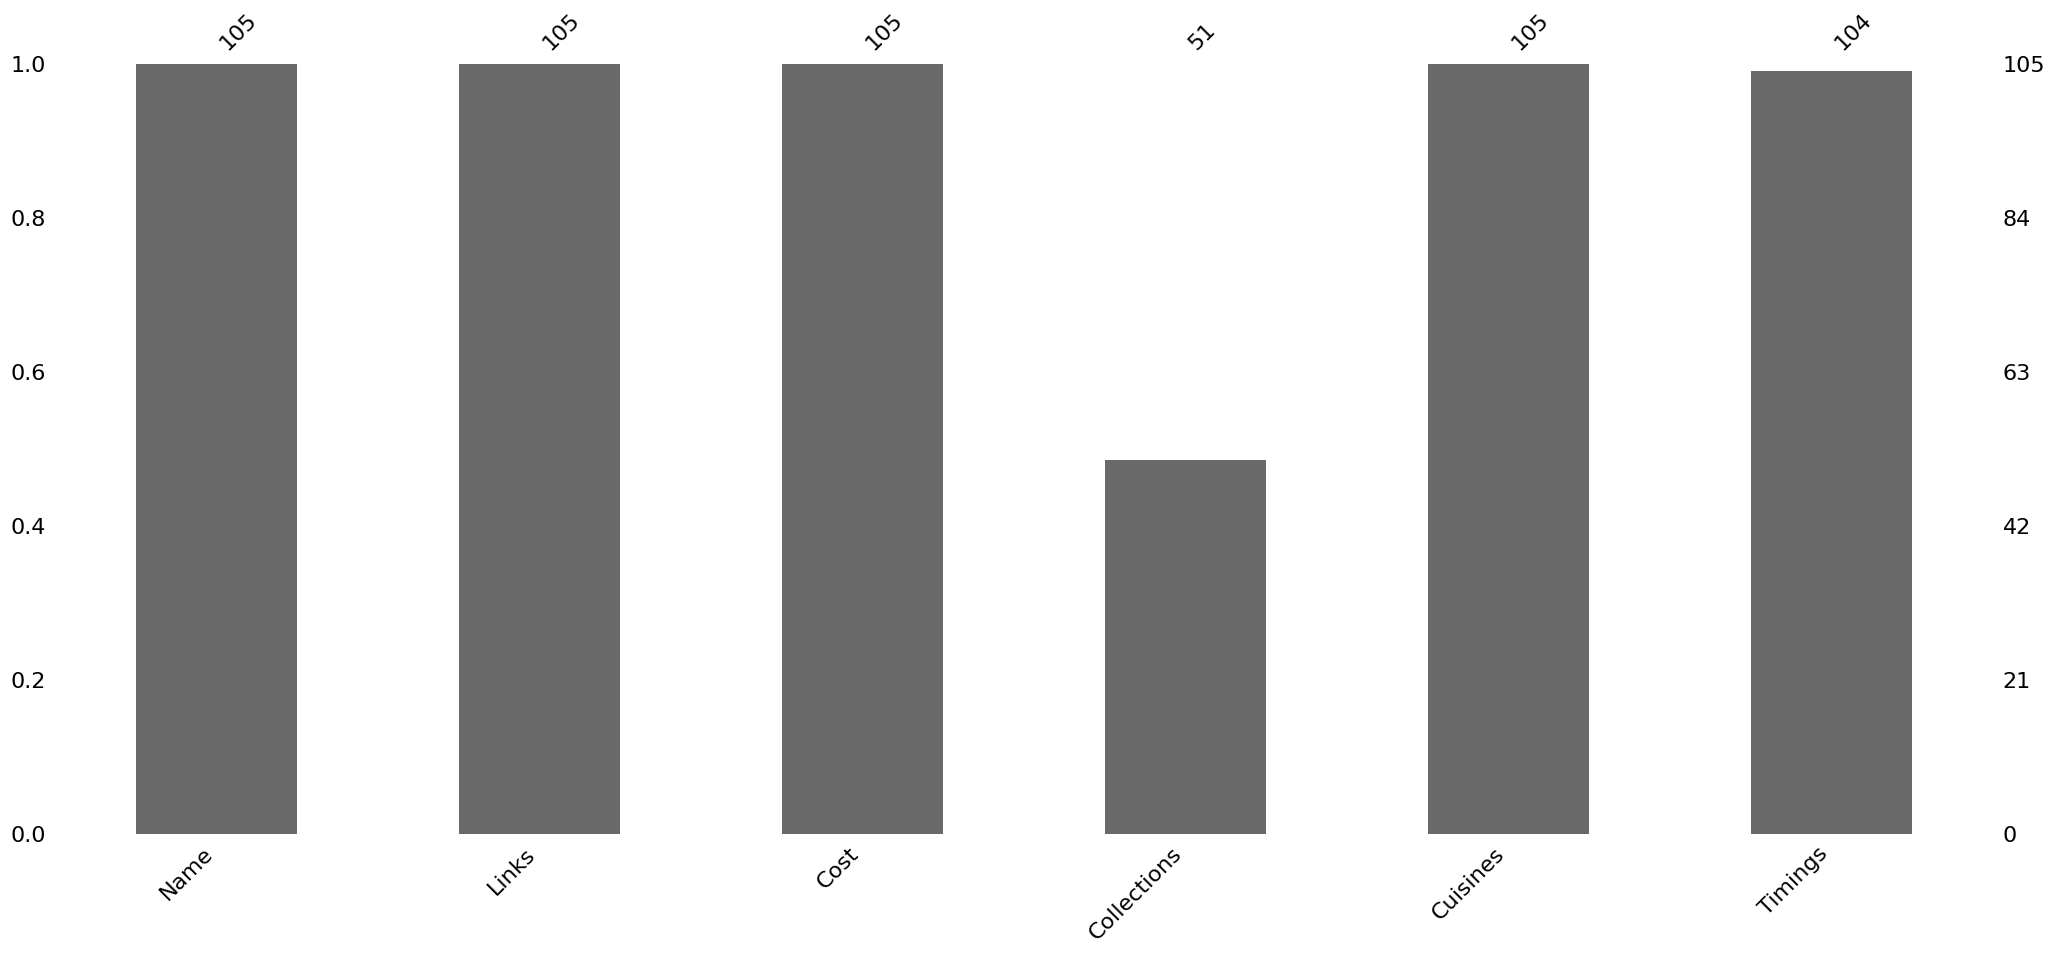

In [482]:
# Visualizing the missing values
msno.bar(meta_df)

<Axes: >

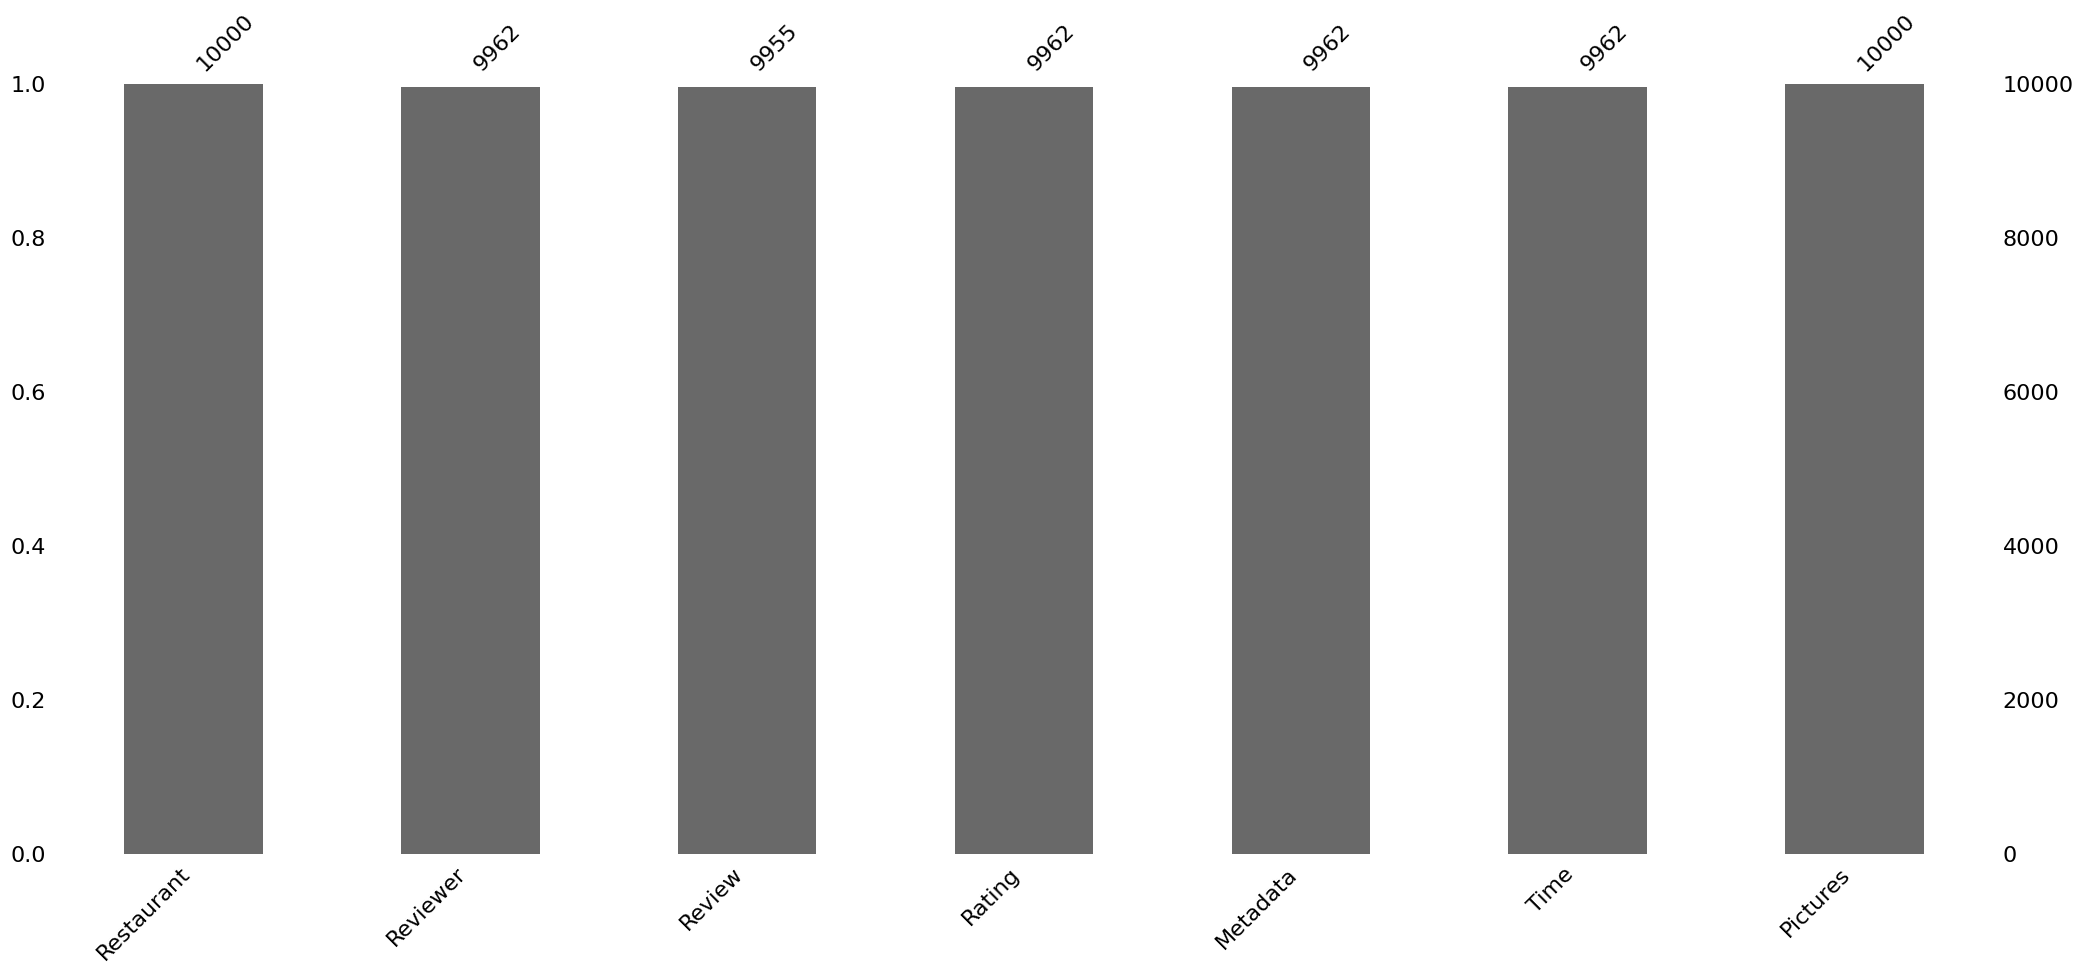

In [483]:
msno.bar(review_df)

### What did you know about your dataset?


Our dataset exhibits missing values specifically in the 'collection' column, which captures sentiments. Given the nature of this column, there is no requirement for imputing null values.

Key points about the dataset:



* The dataset comprises a total of 105 observations, encompassing 6 distinct features.
* Notably, the 'collection' and 'timing' features contain null values.

* All 105 observations are unique, indicating no duplicate entries.

* The 'cost' feature, denoting the amount, is stored as an object due to values being separated by commas (',').
* The 'timing' feature, representing operational hours in textual form, is also categorized as an object data type.


## ***2. Understanding Your Variables***

In [484]:
# Dataset Columns
#meta_data
meta_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [485]:
#review_data
review_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

### Variables Description

## Zomato Restaurant names and Metadata


1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## Zomato Restaurant reviews

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with reviewAnswer Here

### Check Unique Values for each variable.

In [486]:
# Check Unique Values for each variable.
for i in meta_df.columns:
  print(f'Number of unique values in {i} column are {len(meta_df[i].unique())}. \n The unique values are {meta_df[i].unique()}')
  print('-'*80)

Number of unique values in Name column are 105. 
 The unique values are ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar

In [487]:
for i in review_df.columns:
  print(f'Number of unique values in {i} column are {len(review_df[i].unique())}. \n The unique values are {review_df[i].unique()}')
  print('-'*120)

Number of unique values in Restaurant column are 100. 
 The unique values are ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land

## 3. ***Data Wrangling***

### Data Wrangling Code

In [488]:
# Write your code to make your dataset analysis ready.
# Function to clean the cost column
def clean_cost(cost_str):
    try:
        # Remove commas and convert to integer
        return int(cost_str.replace(',', ''))
    except ValueError:

        return None

# Apply the clean_cost function to the 'cost' column
meta_df['Cost'] = meta_df['Cost'].apply(clean_cost)

# Display the cleaned DataFrame
meta_df

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [489]:
# proportion or percentage of occurrences for each unique value in the Rating column.
review_df['Rating'].value_counts(normalize=True)*100

5       38.466171
4       23.820518
1       17.416181
3       11.975507
2        6.866091
4.5      0.692632
3.5      0.471793
2.5      0.190725
1.5      0.090343
Like     0.010038
Name: Rating, dtype: float64

In [490]:
# Removing like value and taking the mean in the rating column.
review_df.loc[review_df['Rating'] == 'Like'] = np.nan

 # Changing the data type of rating column
review_df['Rating']= review_df['Rating'].astype('float64')

print(review_df['Rating'].mean())


3.601044071880333


In [491]:
# Changing the data type of review column.
review_df['Review'] = review_df['Review'].astype(str)

# Creating a review_length column to check the frequency of each rating.
review_df['Review_length'] = review_df['Review'].apply(len)


In [492]:

# review_df['Rating'] = review_df['Rating'].astype('float64')
# review_df['Reviews'], review_df['Followers']= review_df['Metadata'].str.split(',').str
# review_df['Reviews']= pd.to_numeric(review_df['Reviews'].str.split(' ').str[0])
# review_df['Followers']= pd.to_numeric(review_df['Followers'].str.split(' ').str[1])
# review_df['Time']= pd.to_datetime(review_df['Time'])
# review_df['Year']= pd.DatetimeIndex(review_df['Time']).year
# review_df['Hour'] = pd.DatetimeIndex(review_df['Time']).hour


In [493]:
# review_df.Year.unique()

In [494]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     9999 non-null   object 
 1   Reviewer       9961 non-null   object 
 2   Review         10000 non-null  object 
 3   Rating         9961 non-null   float64
 4   Metadata       9961 non-null   object 
 5   Time           9961 non-null   object 
 6   Pictures       9999 non-null   float64
 7   Review_length  10000 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 625.1+ KB


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

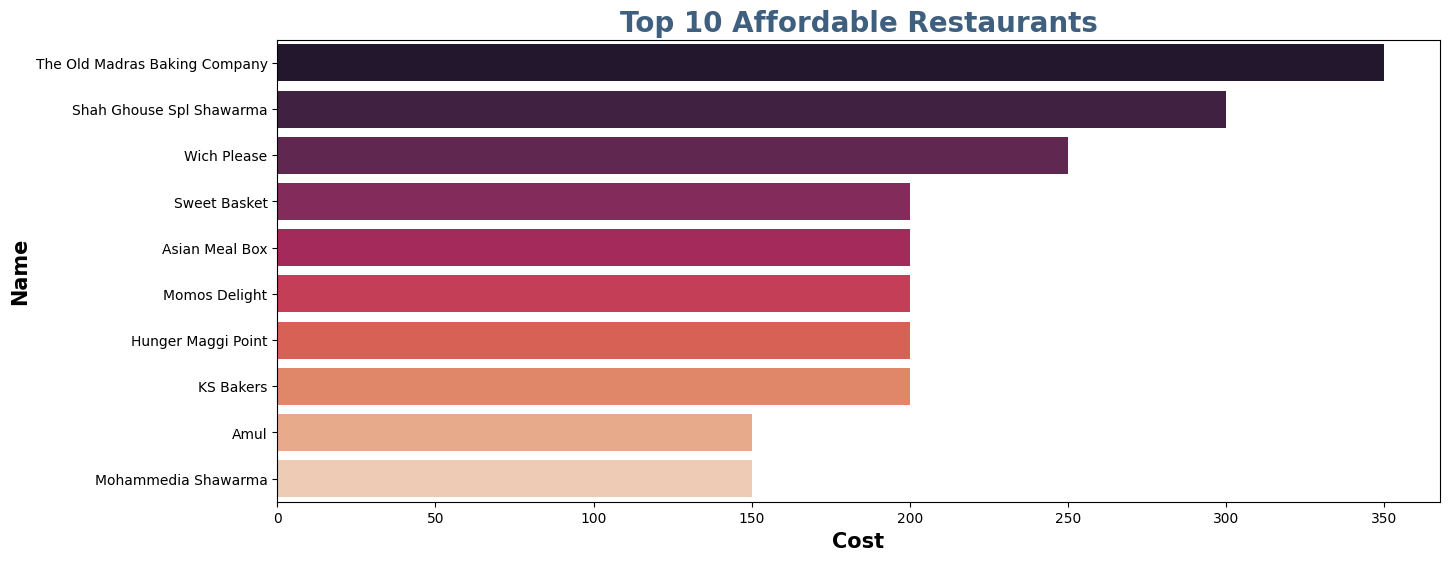

In [495]:
# Chart - 1 visualization code
# Affordable price restaurants.

plt.figure(figsize=(15,6))

# Performing groupby To get values accourding to Names and sort it for visualisation.
top_10_affor_rest=meta_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).tail(10)

# Use Seaborn's barplot with horizontal orientation
ax = sns.barplot(x='Cost', y='Name', data=top_10_affor_rest, palette='rocket')

# Set plot labels and title
plt.title("Top 10 Affordable Restaurants", fontsize=20, weight='bold', color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.xlabel("Cost", weight='bold', fontsize=15)
plt.ylabel("Name", weight='bold', fontsize=15)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

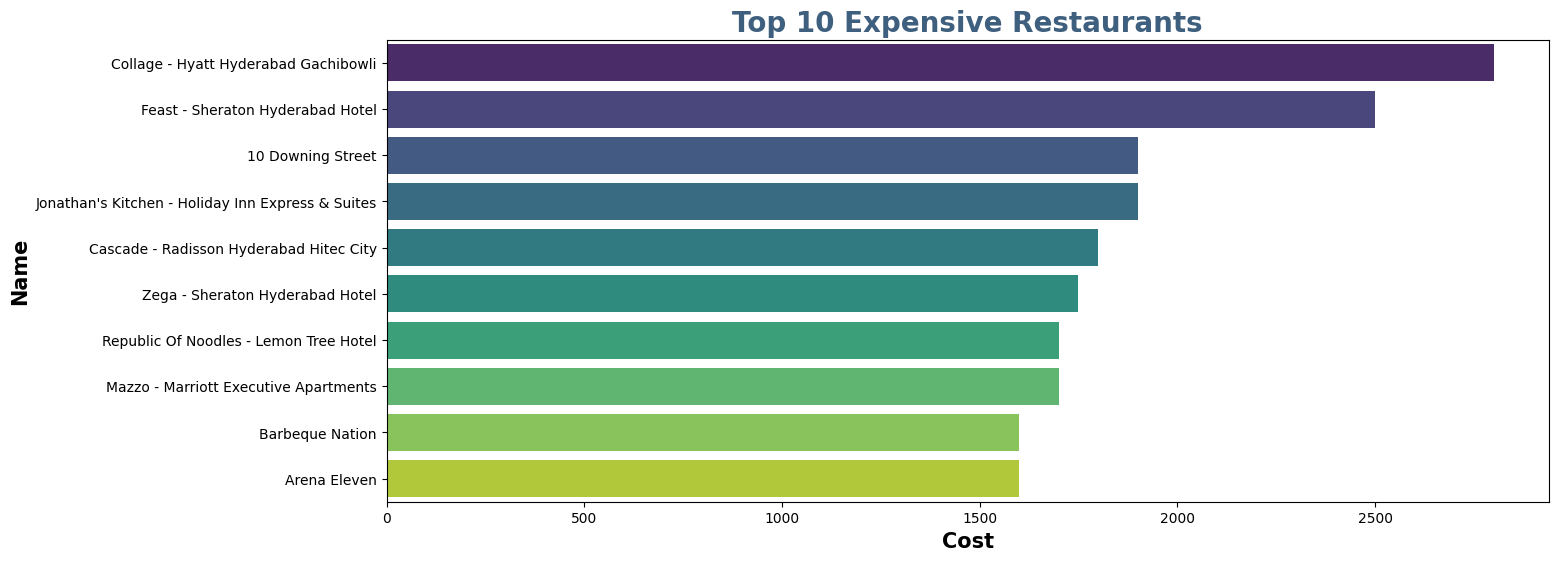

In [496]:
# Chart - 2 visualization code
# expensive restaurants.

plt.figure(figsize=(15,6))

# Performing groupby To get values accourding to Names and sort it for visualisation.
top_10_affor_rest=meta_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)

# Use Seaborn's barplot with horizontal orientation
ax = sns.barplot(x='Cost', y='Name', data=top_10_affor_rest, palette='viridis')

# Set plot labels and title
plt.title("Top 10 Expensive Restaurants", fontsize=20, weight='bold', color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.xlabel("Cost", weight='bold', fontsize=15)
plt.ylabel("Name", weight='bold', fontsize=15)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [497]:
# Chart - 3 visualization code

# We will extrapolate the 15 profiles that have made more reviews.

# Groupby on the basis of rivewer gives the fequency of the reviews
reviewer_list = review_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')

 # Sorting the frequency of reviews decending
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)

# Selecting the top 15 reviewrs
top_reviewers = reviewer_list[:15]


Text(0, 0.5, 'N of reviews')

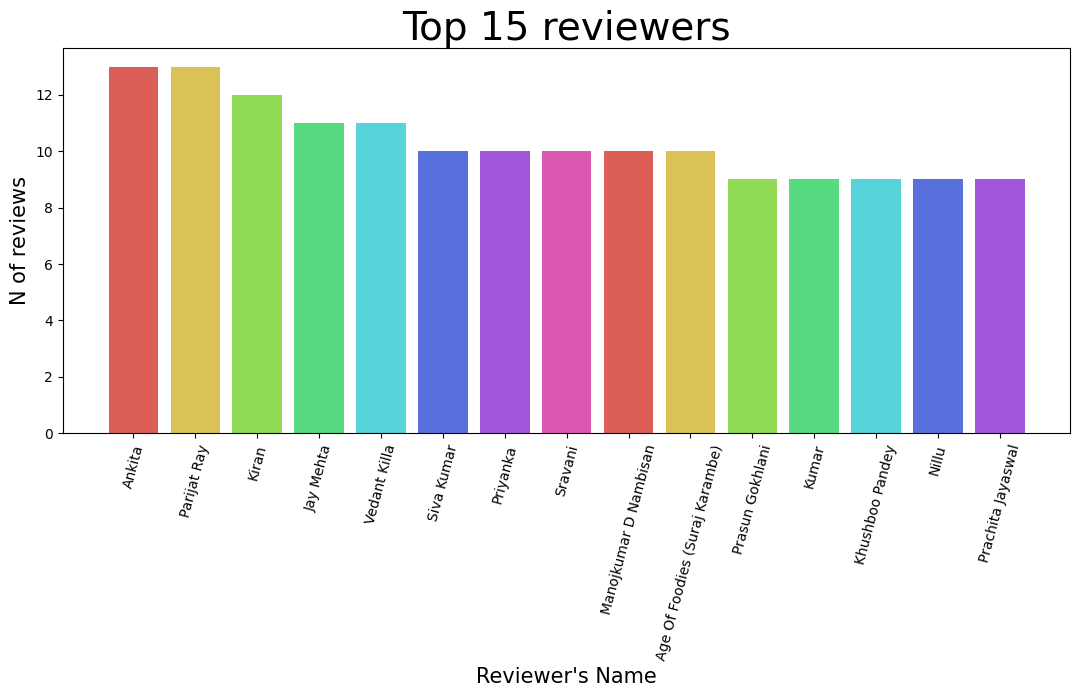

In [498]:
#Visualizing the top 15 reviewers.
plt.figure(figsize=(13,5))
plt.bar(top_reviewers['Reviewer'], top_reviewers['Review_Count'], color = sns.color_palette("hls", 8))
plt.xticks(rotation=75)
plt.title('Top 15 reviewers',size=28)
plt.xlabel("Reviewer's Name",size=15)
plt.ylabel('N of reviews',size=15)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<Axes: >

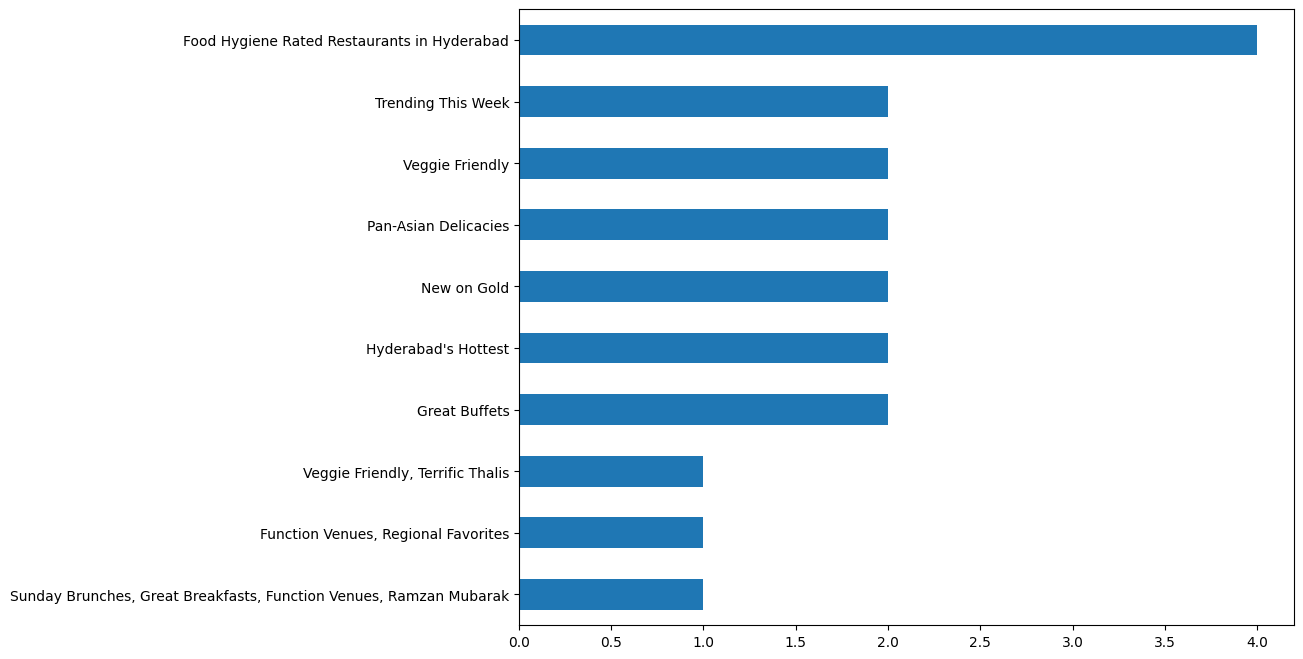

In [499]:
# Chart - 4 visualization code
# Visualisation the value counts of collection.
meta_df['Collections'].value_counts()[0:10].sort_values().plot(figsize=(10,8),kind='barh')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

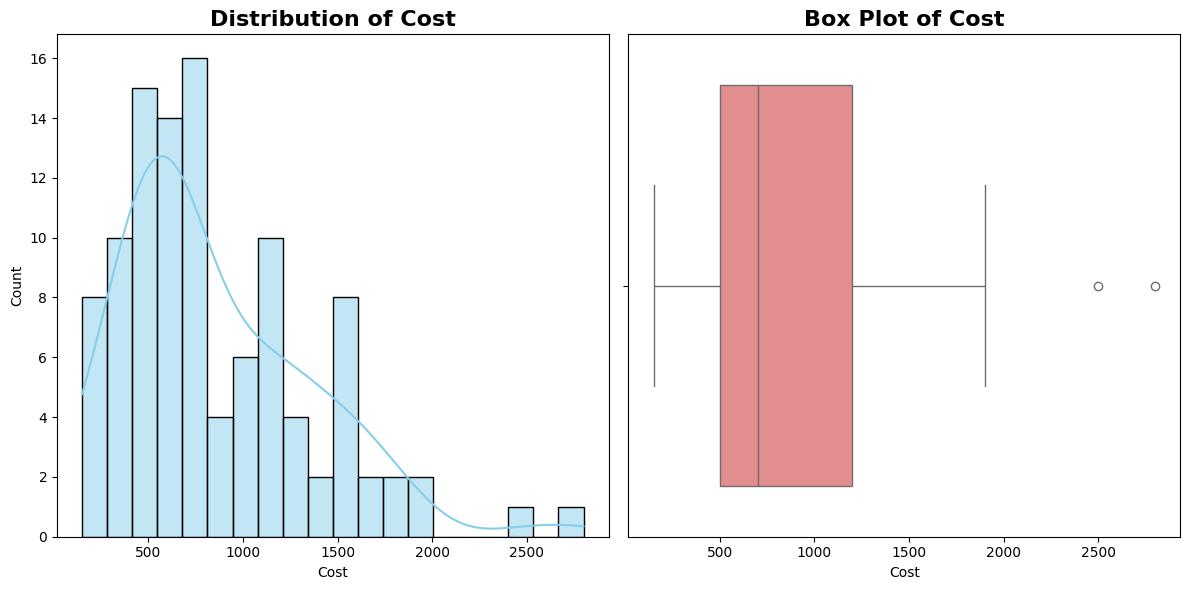

In [500]:
# Chart - 5 visualization code
plt.figure(figsize=(12, 6))

# Distribution of Cost using a histogram
plt.subplot(1, 2, 1)
sns.histplot(meta_df['Cost'], bins=20, color='skyblue', kde=True)
plt.title('Distribution of Cost', fontsize=16, weight='bold')

# Box plot for Cost distribution
plt.subplot(1, 2, 2)
sns.boxplot(x=meta_df['Cost'], color='lightcoral')
plt.title('Box Plot of Cost', fontsize=16, weight='bold')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

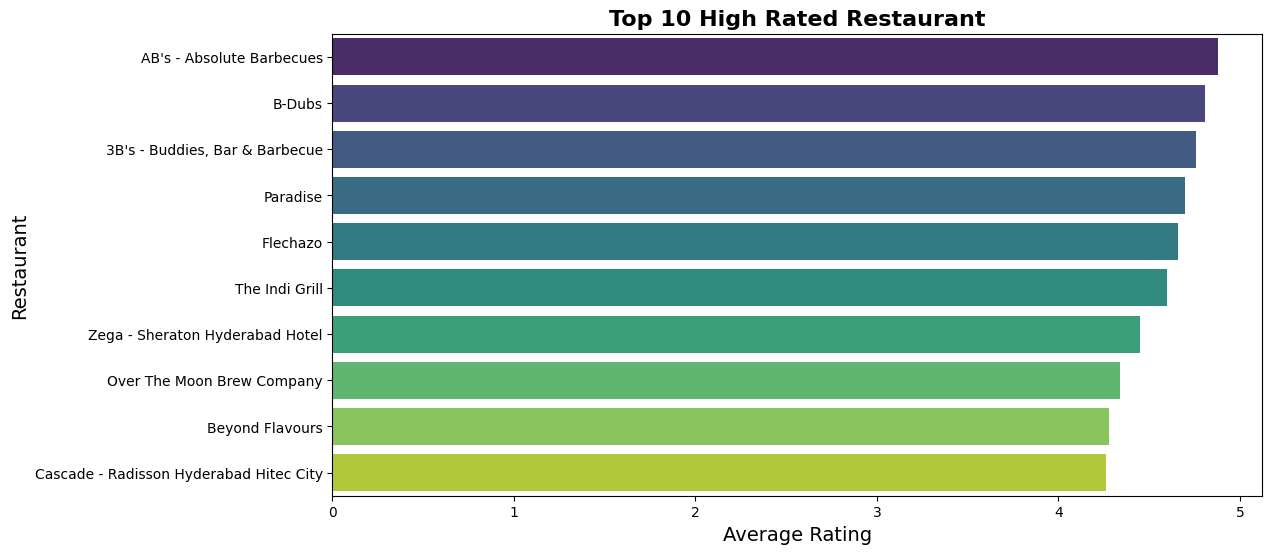

In [501]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 6))

# Calculate the average rating by restaurant
avg_rating_by_restaurant = review_df.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by='Rating', ascending= False).head(10)

# Bar plot for average rating by restaurant
sns.barplot(x='Rating', y='Restaurant', data=avg_rating_by_restaurant, palette='viridis')
plt.title('Top 10 High Rated Restaurant', fontsize=16, weight='bold')
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Restaurant', fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

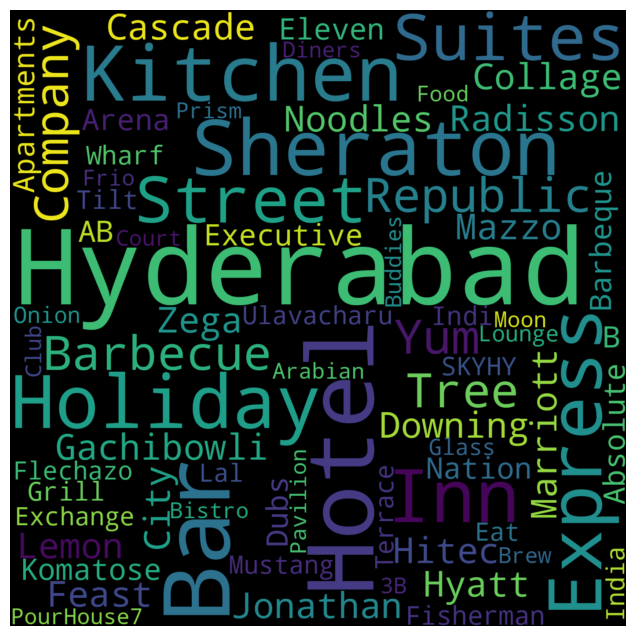

In [502]:
# Chart - 7 visualization code
# Creating word cloud for expensive restaurants.
plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[:30])

# Creating word_cloud with text as argument in .generate() method.
word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud.
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off");

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

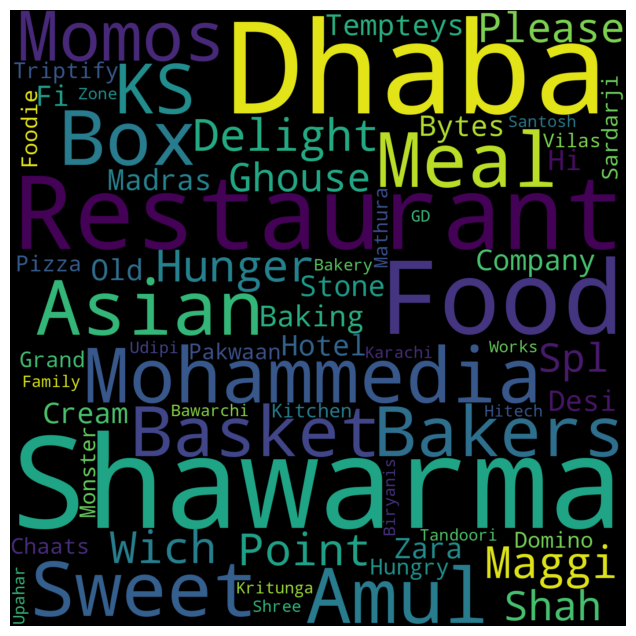

In [503]:
# Chart - 8 visualization code
# Creating word cloud for Affordable restaurants.
plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending= True).Name[:30])

# Creating word_cloud with text as argument in .generate() method.
word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud.
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off");

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [504]:
# Chart - 9 visualization code

# Visualizing the rating column against the review length.
# Polting the frequency of the rating on scatter bar plot

import plotly.express as px
fig = px.scatter(review_df, x=review_df['Rating'], y=review_df['Review_length'])
fig.update_layout(title_text="Rating vs Review Length")
fig.update_xaxes(ticks="outside", tickwidth=1, tickcolor='crimson',tickangle=45, ticklen=10)
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [505]:
# Chart - 10 visualization code

# Creating polarity variable to see sentiments in reviews.(using textblob)
from textblob import TextBlob
review_df['Polarity'] = review_df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

<Axes: ylabel='Frequency'>

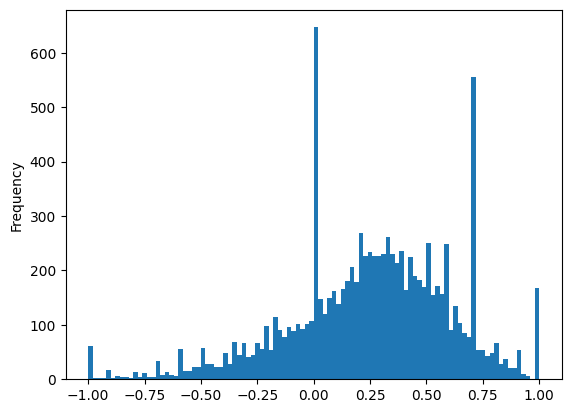

In [506]:
# Visualizing the polarity using histogram.
review_df['Polarity'].plot(kind='hist', bins=100)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [507]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [508]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [509]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [510]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [511]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [512]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [513]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [514]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [515]:
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [516]:
review_df.shape

(10000, 9)

In [517]:
# Handling Missing Values & Missing Value Imputation'
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [518]:
review_df.dropna(inplace= True)

In [519]:
meta_df.dropna(inplace= True)

In [520]:
review_df.isnull().sum()

Restaurant       0
Reviewer         0
Review           0
Rating           0
Metadata         0
Time             0
Pictures         0
Review_length    0
Polarity         0
dtype: int64

In [521]:

# Filling mean in place of null value
review_df['Rating'].fillna(3.6, inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [522]:
# Handling Outliers & Outlier treatments
def outlier_remove(df_in, col):
  q1 = meta_df[col].quantile(0.25)
  q3= meta_df[col].quantile(0.75)
  IQR = q3-q1
  low_bridge=q1- 1.5*IQR
  high_bridge = q3+1.5*IQR
  df_out= df_in.loc[(df_in[col]> low_bridge) & (df_in[col]< high_bridge)]
  return df_out

In [523]:
meta_df= outlier_remove(meta_df, 'Cost')

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [524]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [525]:
# Expand Contraction

#### 2. Lower Casing

In [526]:
# Lower Casing

#### 3. Removing Punctuations

In [527]:
# Remove Punctuations

# Defining the function for removing punctuation.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string

    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)

    # return the text stripped of punctuation marks
    return text.translate(translator)


In [528]:
# Removing punctuation from Cuisines.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: remove_punctuation(x))
meta_df['Cuisines'].head()

0    Chinese Continental Kebab European South India...
1                         Biryani North Indian Chinese
2            Asian Mediterranean North Indian Desserts
3       Biryani North Indian Chinese Seafood Beverages
4    Asian Continental North Indian Chinese Mediter...
Name: Cuisines, dtype: object

In [529]:
# Extracting the stopwords from nltk library for English corpus.
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [530]:
rest_word=['order','restaurant','taste','ordered','good','food','table','place','one','also']
rest_word

['order',
 'restaurant',
 'taste',
 'ordered',
 'good',
 'food',
 'table',
 'place',
 'one',
 'also']

In [531]:
import re

# Assuming 'Review' column contains strings
review_df['Review'] = review_df['Review'].astype(str)

# Removing Special characters and punctuation from review columns.
review_df['Review'] = review_df['Review'].map(lambda x: re.sub('[,\.!?]', '', x))
review_df['Review'] = review_df['Review'].map(lambda x: x.lower())
review_df['Review'] = review_df['Review'].map(lambda x: x.split())
review_df['Review'] = review_df['Review'].apply(lambda x: [item for item in x if item not in stop_words])
review_df['Review'] = review_df['Review'].apply(lambda x: [item for item in x if item not in rest_word])


#### 4. Removing URLs & Removing words and digits contain digits.

In [532]:
# Remove URLs & Remove words and digits contain digits

# Cleaning and removing Numbers.
import re

# Writing a function to remove repeating characters.
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [533]:

# Removing repeating characters from Cuisines.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_repeating_char(x))
meta_df['Cuisines'].head()

0    Chinese Continental Kebab European South India...
1                         Biryani North Indian Chinese
2            Asian Mediterranean North Indian Desserts
3       Biryani North Indian Chinese Seafood Beverages
4    Asian Continental North Indian Chinese Mediter...
Name: Cuisines, dtype: object

In [534]:

# Removing the Numbers from the data.
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [535]:

# Implementing the cleaning.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_numbers(x))
meta_df['Cuisines'].head()


0    Chinese Continental Kebab European South India...
1                         Biryani North Indian Chinese
2            Asian Mediterranean North Indian Desserts
3       Biryani North Indian Chinese Seafood Beverages
4    Asian Continental North Indian Chinese Mediter...
Name: Cuisines, dtype: object

#### 5. Removing Stopwords & Removing White spaces

In [536]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_length,Polarity
0,Beyond Flavours,Rusha Chakraborty,"[ambience, quite, saturday, lunch, cost, effec...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,222,0.660000
1,Beyond Flavours,Anusha Tirumalaneedi,"[ambience, pleasant, evening, service, prompt,...",5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,144,0.606667
2,Beyond Flavours,Ashok Shekhawat,"[must, try, great, great, ambience, thnx, serv...",5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,189,0.540000
3,Beyond Flavours,Swapnil Sarkar,"[soumen, das, arun, great, guy, behavior, sinc...",5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,148,0.500000
4,Beyond Flavours,Dileep,"[goodwe, kodi, drumsticks, basket, mutton, bir...",5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,160,0.577500


In [537]:
# Remove Stopwords


In [538]:
# Creating a function for removing stopwords.
def stopwords(text):
    '''a function for removing the stopword'''

    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in str(text).split() if word.lower() not in stop_words]

    # joining the list of words with space separator
    return " ".join(text)

In [539]:
# Removing stopwords from Cuisines.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda text: stopwords(text))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [540]:
review_df.Review

0       [ambience, quite, saturday, lunch, cost, effec...
1       [ambience, pleasant, evening, service, prompt,...
2       [must, try, great, great, ambience, thnx, serv...
3       [soumen, das, arun, great, guy, behavior, sinc...
4       [goodwe, kodi, drumsticks, basket, mutton, bir...
                              ...                        
9995    [madhumathi, mahajan, well, start, nice, court...
9996    [never, disappointed, us, courteous, staff, se...
9997    [bad, rating, mainly, "chicken, bone, found, v...
9998    [personally, love, prefer, chinese, couple, ti...
9999    [checked, try, delicious, chinese, seen, non-v...
Name: Review, Length: 9961, dtype: object

In [541]:

# Creating word embeddings and t-SNE plot. (for positive and negative reviews).

from gensim.models import word2vec
pos_rev = review_df[review_df.Rating>= 3]
neg_rev = review_df[review_df.Rating< 3]

In [542]:
# Plot for negative reviews.
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['Review']:
        for sentence_list in data[col].iteritems():
            # Assuming 'Review' column already contains lists of words
            word_list = sentence_list[1]
            corpus.append(word_list)

    return corpus

# Display the first two elements of the corpus list
corpus = build_corpus(neg_rev)
corpus[0:2]

[['corn',
  'cheese',
  'balls',
  'manchow',
  'soup',
  'paneer',
  'shashlik',
  'sizzler',
  'sizzler',
  'stale',
  'paneer',
  'smelling',
  'waiter',
  'impolite',
  'even',
  'accept',
  'mistake',
  'never',
  'going'],
 ['went',
  'team',
  'lunch',
  'worst',
  'tasteless',
  'service',
  'slow',
  'ac',
  'working',
  'we’ve',
  'requested',
  'multiple',
  'times',
  'use',
  'please',
  'don’t',
  'waste',
  'money',
  'strictly',
  'recommend',
  'prefer',
  'beyond',
  'flavours']]

In [543]:
# Plot for positive reviews
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['Review']:
        for sentence_list in data[col]:
            # Assuming 'Review' column is a list of sentences (each sentence is a list)
            corpus.append(sentence_list)

    return corpus

# Display the first two elements of the corpus list
corpus = build_corpus(pos_rev)
corpus[0:2]


[['ambience',
  'quite',
  'saturday',
  'lunch',
  'cost',
  'effective',
  'sate',
  'brunch',
  'chill',
  'friends',
  'parents',
  'waiter',
  'soumen',
  'das',
  'really',
  'courteous',
  'helpful'],
 ['ambience',
  'pleasant',
  'evening',
  'service',
  'prompt',
  'experience',
  'soumen',
  'das',
  '-',
  'kudos',
  'service']]

In [544]:
review_df['Review']=review_df['Review'].astype(str)

ps = PorterStemmer()
review_df['Review']=review_df['Review'].map(lambda x: ps.stem(x))


In [545]:

# Checking for the implimented code
review_df['Review']

0       ['ambience', 'quite', 'saturday', 'lunch', 'co...
1       ['ambience', 'pleasant', 'evening', 'service',...
2       ['must', 'try', 'great', 'great', 'ambience', ...
3       ['soumen', 'das', 'arun', 'great', 'guy', 'beh...
4       ['goodwe', 'kodi', 'drumsticks', 'basket', 'mu...
                              ...                        
9995    ['madhumathi', 'mahajan', 'well', 'start', 'ni...
9996    ['never', 'disappointed', 'us', 'courteous', '...
9997    ['bad', 'rating', 'mainly', '"chicken', 'bone'...
9998    ['personally', 'love', 'prefer', 'chinese', 'c...
9999    ['checked', 'try', 'delicious', 'chinese', 'se...
Name: Review, Length: 9961, dtype: object

In [546]:
# Remove White spaces

#### 6. Rephrase Text

In [547]:
# Rephrase Text

#### 7. Tokenization

In [548]:
# Tokenization

#### 8. Text Normalization

In [549]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [550]:
# POS Taging

#### 10. Text Vectorization

In [551]:
# Vectorizing Text

In [552]:

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px

In [553]:

# Create a function to get the subjectivity
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [554]:

# Create a function to get the polarity
def polarity(text):
    return TextBlob(text).sentiment.polarity


In [555]:
# Applying subjectivity and the polarity function to the respective columns
review_df['Subjectivity'] = review_df['Review'].apply(subjectivity)
review_df['Polarity'] = review_df['Review'].apply(polarity)


In [556]:

# Checking for created columns
review_df['Polarity']


0       0.600000
1       0.733333
2       0.540000
3       0.800000
4       0.350000
          ...   
9995    0.277841
9996    0.174621
9997    0.082074
9998    0.560000
9999    0.103030
Name: Polarity, Length: 9961, dtype: float64

In [557]:
# Checking for created columns
review_df['Subjectivity']

0       0.900000
1       0.966667
2       0.740000
3       0.750000
4       0.450000
          ...   
9995    0.646591
9996    0.710606
9997    0.501252
9998    0.620000
9999    0.630303
Name: Subjectivity, Length: 9961, dtype: float64

In [558]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


In [559]:
# Apply get analysis function to separate the sentiments from the column
review_df['Analysis'] = review_df['Polarity'].apply(getAnalysis)

In [560]:

# plot the polarity and subjectivity
fig = px.scatter(review_df,
                 x='Polarity',
                 y='Subjectivity',
                 color = 'Analysis',
                 size='Subjectivity')

In [561]:

# Add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1,
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [562]:
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning);

In [563]:

# converting the cuisines to lower case

meta_df_main['Cuisines'] = meta_df_main['Cuisines'].apply(lambda x : x.lower());

#### 2. Feature Selection

In [564]:
# Select your features wisely to avoid overfitting
# Separating the Name, cost and cuisines column.
cuisine_df = meta_df_main.loc[:,['Name','Cost','Cuisines']]
meta_df_main.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"biryani, north indian, chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","asian, mediterranean, north indian, desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"biryani, north indian, chinese, seafood, bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","asian, continental, north indian, chinese, med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [565]:
# Overview of separated variables.
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i..."
1,Paradise,800,"biryani, north indian, chinese"
2,Flechazo,"1,300","asian, mediterranean, north indian, desserts"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever..."
4,Over The Moon Brew Company,"1,200","asian, continental, north indian, chinese, med..."


In [566]:

# Removing spces from cuisine column.
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.replace(' ','')

# Spliting the Words in cuisine.
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.split(',')

# Overview on text cleaning.
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
1,Paradise,800,"[biryani, northindian, chinese]"
2,Flechazo,"1,300","[asian, mediterranean, northindian, desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"[biryani, northindian, chinese, seafood, bever..."
4,Over The Moon Brew Company,"1,200","[asian, continental, northindian, chinese, med..."


In [567]:

# converting a list of labels for each sample into a binary indicator matrix
mlb = MultiLabelBinarizer(sparse_output=True)

In [568]:

# converting the Cuisines column in the cuisine_df DataFrame into a binary indicator matrix.
cuisine_df = cuisine_df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(cuisine_df.pop('Cuisines')),
                                                               index=cuisine_df.index, columns=mlb.classes_))

# Overview
cuisine_df.head()

,Name,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,...,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,Flechazo,"1,300",0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,"1,200",0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [569]:
# Checking the unique for rating.
review_df['Rating'].unique()

# Remove nan rating in Rating column.
review_df.dropna(subset=['Rating'],inplace=True)


# Change data type of rating column to float.
review_df['Rating']= review_df['Rating'].astype('float')


# Dropping the null Values from review column.
review_df.dropna(subset =['Review'], inplace=True)


# Grouping the restaurant on the basis of average rating.
ratings_df = review_df.groupby('Restaurant')['Rating'].mean().reset_index()


# Top highly rated 15 restaurants.
ratings_df .sort_values(by='Rating',ascending = False).head(15)


,Restaurant,Rating
3,AB's - Absolute Barbecues,4.880
11,B-Dubs,4.810
2,"3B's - Buddies, Bar & Barbecue",4.760
67,Paradise,4.700
35,Flechazo,4.660
87,The Indi Grill,4.600
97,Zega - Sheraton Hyderabad Hotel,4.450
64,Over The Moon Brew Company,4.340
16,Beyond Flavours,4.280
19,Cascade - Radisson Hyderabad Hitec City,4.260


In [570]:

#  Combining the information on restaurant cuisine and ratings into a single DataFrame.
df_cluster = cuisine_df.merge(ratings_df, left_on='Name',right_on='Restaurant')


# Overview
df_cluster.head()

,Name,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,...,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Restaurant,Rating
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,Beyond Flavours,4.28
1,Paradise,800,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,Paradise,4.70
2,Flechazo,"1,300",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Flechazo,4.66
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,Shah Ghouse Hotel & Restaurant,3.21
4,Over The Moon Brew Company,"1,200",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Over The Moon Brew Company,4.34


In [571]:
print(df_cluster.columns)


Index(['Name', 'Cost', 'american', 'andhra', 'arabian', 'asian', 'bakery',
       'bbq', 'beverages', 'biryani', 'burger', 'cafe', 'chinese',
       'continental', 'desserts', 'european', 'fastfood', 'fingerfood', 'goan',
       'healthyfood', 'hyderabadi', 'icecream', 'indonesian', 'italian',
       'japanese', 'juices', 'kebab', 'lebanese', 'malaysian', 'mediterranean',
       'mexican', 'mithai', 'modernindian', 'momos', 'mughlai', 'northeastern',
       'northindian', 'pizza', 'salad', 'seafood', 'southindian', 'spanish',
       'streetfood', 'sushi', 'thai', 'wraps', 'Restaurant', 'Rating'],
      dtype='object')


In [572]:

# Changing name and order of columns
df_cluster = df_cluster[['Name', 'Cost','Rating', 'american', 'andhra', 'arabian', 'asian', 'bbq',
       'bakery', 'beverages', 'biryani', 'burger', 'cafe', 'chinese',
       'continental', 'desserts', 'european', 'fastfood', 'fingerfood', 'goan',
       'healthyfood', 'hyderabadi', 'icecream', 'indonesian', 'italian',
       'japanese', 'juices', 'kebab', 'lebanese', 'malaysian', 'mediterranean',
       'mexican', 'mithai', 'modernindian', 'momos', 'mughlai', 'northeastern',
       'northindian', 'pizza', 'salad', 'seafood', 'southindian', 'spanish',
       'streetfood', 'sushi', 'thai', 'wraps']]




# Checking the data type and null counts for newly created variables.
df_cluster.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype           
---  ------         --------------  -----           
 0   Name           100 non-null    object          
 1   Cost           100 non-null    object          
 2   Rating         100 non-null    float64         
 3   american       100 non-null    Sparse[int64, 0]
 4   andhra         100 non-null    Sparse[int64, 0]
 5   arabian        100 non-null    Sparse[int64, 0]
 6   asian          100 non-null    Sparse[int64, 0]
 7   bbq            100 non-null    Sparse[int64, 0]
 8   bakery         100 non-null    Sparse[int64, 0]
 9   beverages      100 non-null    Sparse[int64, 0]
 10  biryani        100 non-null    Sparse[int64, 0]
 11  burger         100 non-null    Sparse[int64, 0]
 12  cafe           100 non-null    Sparse[int64, 0]
 13  chinese        100 non-null    Sparse[int64, 0]
 14  continental    100 non-null    Sparse[int64

In [573]:
#  Removing commas from the cost variables.
df_cluster['Cost']= df_cluster['Cost'].str.replace(',','')


# Changing the data type of the cost column.
df_cluster['Cost']= df_cluster['Cost'].astype('float')



##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [574]:
# Transform Your data

Answer Here.

### 6. Data Scaling

In [575]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [576]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

### 8. Data Splitting

In [577]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [578]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

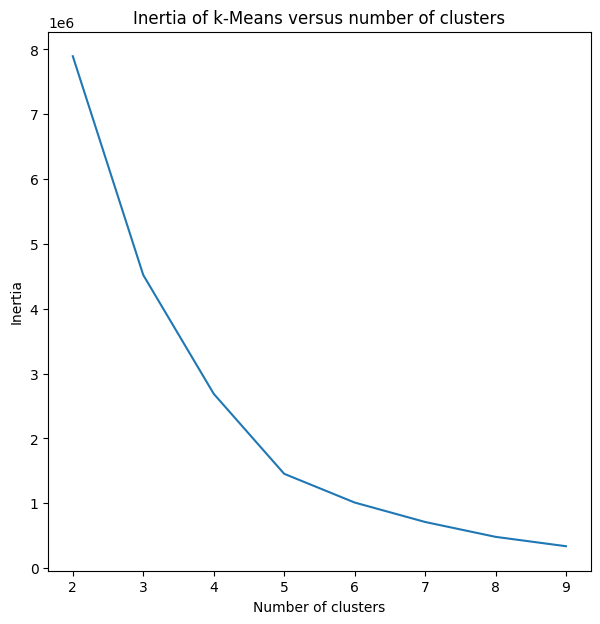

In [579]:

# Create a list of inertia scores for different numbers of clusters
scores = [KMeans(n_clusters=i+2, random_state=11).fit(df_cluster.drop('Name',axis=1)).inertia_
          for i in range(8)]

# Create a line plot of inertia scores versus number of clusters
plt.figure(figsize=(7,7))
sns.lineplot(x=np.arange(2, 10), y=scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia of k-Means versus number of clusters')
plt.show()

In [580]:

# Initializing a K-Means clustering model with number of clusters and random state.
model = KMeans(random_state=11, n_clusters=5)
model.fit(df_cluster.drop('Name',axis=1))

KMeans(n_clusters=5, random_state=11)

In [581]:

# predict the cluster label of a new data point based on a trained clustering model.
cluster_lbl = model.predict(df_cluster.drop('Name',axis=1))


df_cluster['labels'] = cluster_lbl


# Creating the data frame for each cluster.
cluster_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
cluster_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
cluster_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
cluster_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
cluster_4 = df_cluster[df_cluster['labels'] == 4].reset_index()



list_of_cluster=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]

In [582]:
# Top cuisines in each cluster
for i,df in enumerate(list_of_cluster):
  print(f'Top cuisines in cluster {i}\n', df.drop(['index','Name','Cost','Rating','labels'],axis=1).sum().sort_values(ascending=False).nlargest(4))

Top cuisines in cluster 0
 northindian    16
chinese         9
fastfood        8
desserts        7
dtype: int64
Top cuisines in cluster 1
 northindian    11
continental     6
asian           5
chinese         4
dtype: int64
Top cuisines in cluster 2
 northindian    18
chinese        18
biryani        11
fastfood        5
dtype: int64
Top cuisines in cluster 3
 asian           2
italian         2
continental     2
modernindian    1
dtype: int64
Top cuisines in cluster 4
 northindian    14
chinese         9
italian         7
continental     7
dtype: int64


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

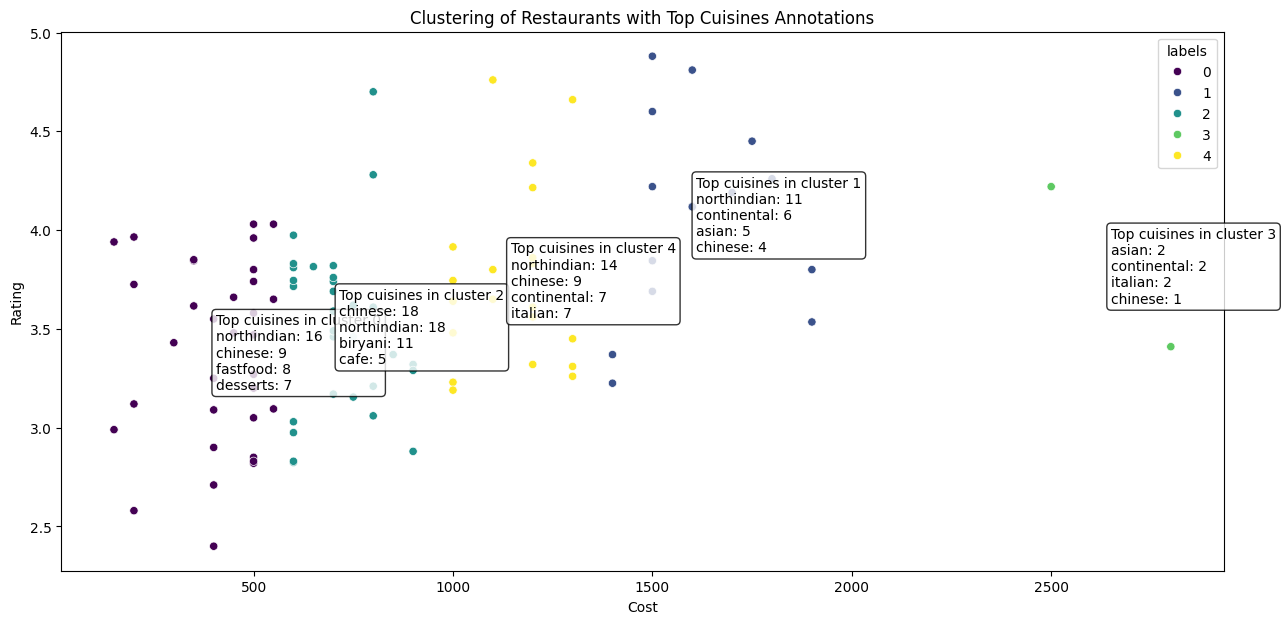

In [583]:
# Visualizing evaluation Metric Score chart
# Assuming df_cluster is the original DataFrame
plt.figure(figsize=(15, 7))
sns.scatterplot(x='Cost', y='Rating', hue='labels', data=df_cluster, palette='viridis')

# Add annotations for top cuisines in each cluster
for i, df in enumerate(list_of_cluster):
    top_cuisines = df.drop(['index', 'Name', 'Cost', 'Rating', 'labels'], axis=1).sum().nlargest(4)
    top_cuisines_str = '\n'.join([f'{cuisine}: {count}' for cuisine, count in top_cuisines.items()])
    plt.text(df['Cost'].mean(), df['Rating'].mean(), f'Top cuisines in cluster {i}\n{top_cuisines_str}',
             ha='left', va='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.xlabel('Cost')
plt.ylabel('Rating')
plt.title('Clustering of Restaurants with Top Cuisines Annotations')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [584]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [585]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [586]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [587]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [588]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [589]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [590]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [591]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The project demonstrated effective clustering of restaurants, revealing distinct groups based on various features. This clustering can empower both users and businesses, aiding in informed decision-making. On the other hand, sentiment analysis shed light on user sentiments in restaurant reviews, offering valuable insights for businesses to enhance their services and overall user experience.

In summary, the project successfully provided actionable insights through clustering and sentiment analysis, offering a comprehensive understanding of the restaurant landscape and user sentiments. These findings can serve as a foundation for strategic improvements, contributing to the overall success and satisfaction of both users and businesses in the food industry.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***